# Сборный проект

Перед нами стоит задача спланировать будущую рекламную компанию для магазина игр "Стримчик". Для этого нужно проанализировать демографические данные покупателей и факторы влияющие на успешность игр. 

## Извлечение данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [2]:
games = pd.read_csv("/datasets/games.csv")

In [3]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Получили датасет из 16715 строк и 11 столбцов.

## Предобработка данных

In [4]:
games.columns = games.columns.str.lower()
games = games.rename(columns={'year_of_release': 'year'})
games.head()

,name,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [5]:
display(
    games.duplicated().sum(),
    games['name'].duplicated().sum(),
    games['platform'].duplicated().sum()
)

0

5155

16684

In [6]:
games[games[['name','platform']].duplicated()]

,name,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.0,0.13,0.02,0.10,83.0,8.5,T
4127,Sonic the Hedgehog,PS3,NaN,Platform,0.0,0.48,0.00,0.00,43.0,4.1,E10+
11715,Need for Speed: Most Wanted,PC,2012.0,Racing,0.0,0.06,0.00,0.02,82.0,8.5,T
14244,NaN,GEN,1993.0,NaN,0.0,0.00,0.03,0.00,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012.0,Sports,0.0,0.01,0.00,0.00,83.0,5.5,E


Дубликатов нет.

In [7]:
display(
    games.info(),
    games['critic_score'].unique(),
    games['user_score'].unique()
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          16713 non-null  object 
 1   platform      16715 non-null  object 
 2   year          16446 non-null  float64
 3   genre         16713 non-null  object 
 4   na_sales      16715 non-null  float64
 5   eu_sales      16715 non-null  float64
 6   jp_sales      16715 non-null  float64
 7   other_sales   16715 non-null  float64
 8   critic_score  8137 non-null   float64
 9   user_score    10014 non-null  object 
 10  rating        9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Можно было бы поменять тип данных в year, critic_score и user_score(умножа его на 10 и округлив в меньшую сторону), но там есть пропущенные значения, которые я не хочу округлять/придумывать.

In [8]:
games.isna().sum()

name               2
platform           0
year             269
genre              2
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score    8578
user_score      6701
rating          6766
dtype: int64

In [9]:
games.query('genre.isna()')

,name,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Строки с пропусками в столбце genre, также имеют много пропусков в других строках, и околонулевые продажи.

In [10]:
games.dropna(subset=['genre'], inplace=True)

In [11]:
display(
    games.query('year.isna()'),
    games.query('critic_score.isna()'),
    games.query('user_score.isna()'),
    games.query('rating.isna()'))

,name,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


,name,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


,name,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


,name,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [12]:
games.query('critic_score.isna() & user_score.isna() & rating.isna()')

,name,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Интересно что большое число пропусков в столбцах critic_score, user_score и rating совпадают по user_score. Значит если игра настолько непопулярна, что у нее нет отзывов пользователей, значит у нее не будет и отзывов критиков и рейтинга.

In [13]:
games[games['user_score'] == 'tbd']

,name,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


Похоже что аббревиатура tbd означает 'to be displayed' или 'to be determined.

In [14]:
games[games['rating'].isna()]

,name,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Заполним пропуски в рейтингах текстовым значением, и поменяем tbd на 0

In [15]:
games[(games['user_score'].notna()) & (games['user_score'] != "tbd")]['user_score'].count()

7590

In [16]:
games.loc[games['user_score'] == 'tbd', 'user_score'] = np.nan
games.loc[games['rating'].isna(), 'rating'] = 'unrated'

In [17]:
games['user_score'] = games['user_score'].astype('float')
games['user_score']

0        8.0
1        NaN
2        8.3
3        8.0
4        NaN
        ... 
16710    NaN
16711    NaN
16712    NaN
16713    NaN
16714    NaN
Name: user_score, Length: 16713, dtype: float64

In [18]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales']

In [19]:
display(
    games.query('user_score == 0')['total_sales'].describe(),
    games['total_sales'].describe()
)

count    1.00
mean     0.66
std       NaN
min      0.66
25%      0.66
50%      0.66
75%      0.66
max      0.66
Name: total_sales, dtype: float64

count    16713.000000
mean         0.485972
std          1.413780
min          0.000000
25%          0.060000
50%          0.150000
75%          0.430000
max         74.090000
Name: total_sales, dtype: float64

Text(0.5, 1.0, 'Пропорция продаж игр без пользовательского рейтинга ко всем играм')

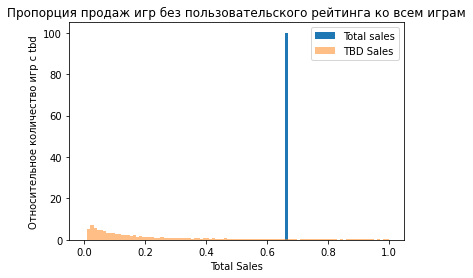

In [20]:
x = games.query('user_score == 0')['total_sales'].plot(range=(0,1), bins=100, density=True, kind='hist')
x = games['total_sales'].plot(range=(0,1), bins=100, alpha=0.5, density=True, kind='hist')
x.set_xlabel('Total Sales')
x.set_ylabel('Относительное количество игр с tbd')
x.legend(['Total sales', 'TBD Sales'])
x.set_title('Пропорция продаж игр без пользовательского рейтинга ко всем играм')
#plt.xlabel('Total sales')
#plt.ylabel('Относительное количество игр с tbd')

Хотя игр с tbd меньше, они равномерно распределены по продажам со всеми играми.

## Исследовательский анализ

Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
    
Посмотрите, как менялись продажи по платформам.
Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
Не учитывайте в работе данные за предыдущие годы.
Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
Соотнесите выводы с продажами игр на других платформах.
Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

Text(0.5, 1.0, 'Количество игр выпускаемых в год')

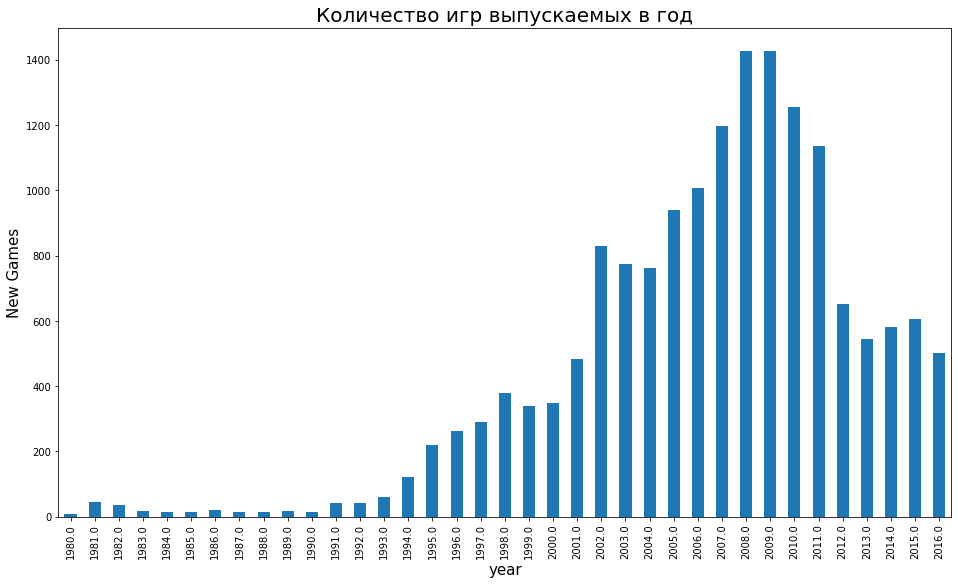

In [21]:
year_sales = games.groupby('year')['name'].count()
y = year_sales.plot(kind='bar', figsize=(16,9))
y.set_xlabel('year', fontsize=15)
y.set_ylabel('New Games', fontsize=15)
y.set_title('Количество игр выпускаемых в год', fontsize=20)


Количество выпускаемых игр росло вплоть до 2007 года, и потом пошло на спад. В 2016 году выпустили примерно столько же игр, сколько и в 2001! Актуальный период 2015-2016.

In [22]:
recent_games = games[(games['year'] == 2015) | (games['year'] == 2016)]
recent_games

,name,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unrated,12.25
77,FIFA 16,PS4,2015.0,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,7.30
87,Star Wars Battlefront (2015),PS4,2015.0,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,unrated,6.70
94,FIFA 17,PS4,2016.0,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,6.49
99,Call of Duty: Black Ops 3,XOne,2015.0,Shooter,4.59,2.11,0.01,0.68,NaN,NaN,unrated,6.71
...,...,...,...,...,...,...,...,...,...,...,...,...
16699,The Longest 5 Minutes,PSV,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,unrated,0.01
16703,Strawberry Nauts,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unrated,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,unrated,0.01
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unrated,0.01


In [23]:
games.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head()

platform
PS2     1062.33
X360     885.66
Wii      828.44
PS3      803.97
DS       746.86
Name: total_sales, dtype: float64

Топ-5 платформ по продажам за все время: 
PS2     1062.33
X360     885.66
Wii      828.44
PS3      803.97
DS       746.86

In [24]:
games[games['platform'] == 'PS2'].groupby('year')['total_sales'].sum()

year
2000.0     35.59
2001.0    149.65
2002.0    183.66
2003.0    163.62
2004.0    171.96
2005.0    141.51
2006.0     89.18
2007.0     52.30
2008.0     34.59
2009.0     16.24
2010.0      4.44
2011.0      0.35
Name: total_sales, dtype: float64

<AxesSubplot:xlabel='year'>

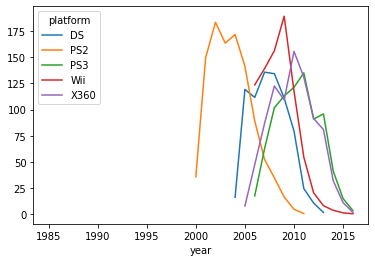

In [25]:
platforms = ['PS2', 'X360', 'Wii', 'PS3', 'DS']


(
    games
    .query('platform.isin(@platforms)')
    .pivot_table(index='year',columns='platform',values='total_sales',aggfunc='sum')
    .plot()
)



Средний срок жизни платформы - 5-7 лет

In [26]:
top_2015_2016 = recent_games.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head()
display(
    top_2015_2016,
    top_2015_2016.sum() / recent_games['total_sales'].sum() * 100)

platform
PS4     159.45
XOne     78.58
3DS      41.25
WiiU     19.47
PS3      17.93
Name: total_sales, dtype: float64

89.67802225809206

Топ 5 платформ по продажам за 2015-2016 год. 
PS4     159.45
XOne    78.58
3DS     41.25
WiiU    19.47
PS3     17.93

На эти платформы приходится почти 90% всех продаж.

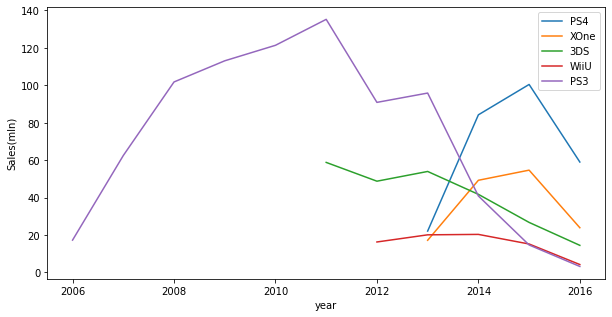

In [27]:
platforms = ['PS4', 'XOne', '3DS', 'WiiU', 'PS3']
top_games = games.query('platform in @platforms')
for platform in platforms:
    data = top_games[top_games['platform'] == platform].groupby('year')['total_sales'].sum()
    data.plot(ylabel='Sales(mln)', figsize=(10,5))
    plt.legend(platforms)

В 2016 произошел спад продаж всех топовых платформ.

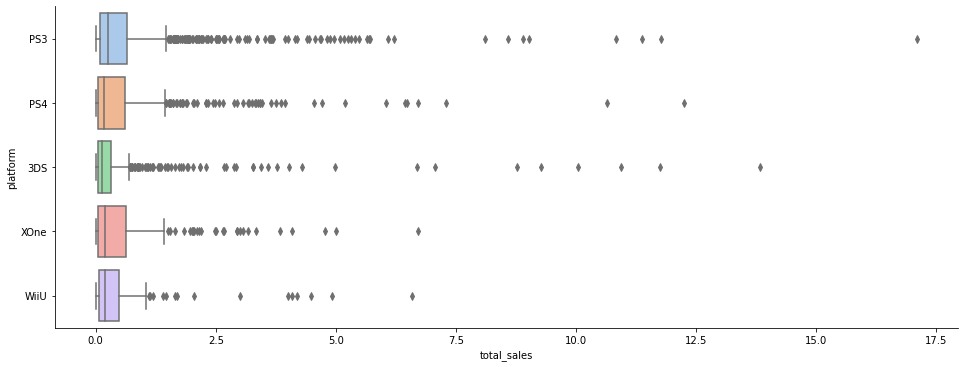

In [28]:
g = sns.catplot(y='platform', x='total_sales', kind="box", data = top_games, orient='h', palette = 'pastel')
g.fig.set_figwidth(15)

(0.0, 1.0)

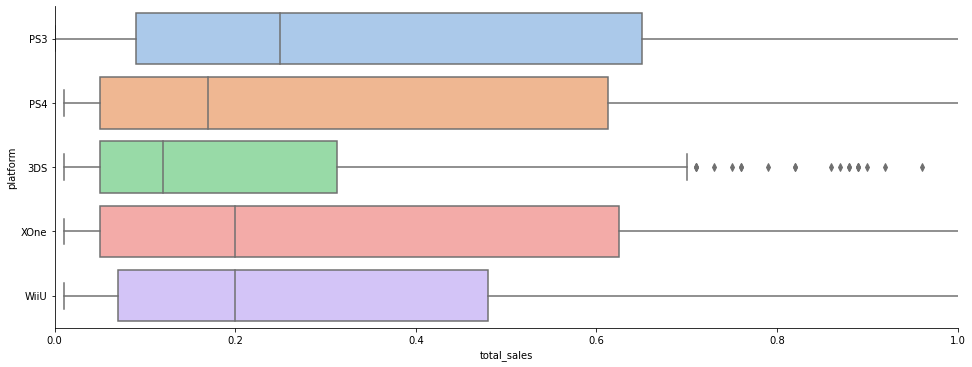

In [29]:
g = sns.catplot(y='platform', x='total_sales', kind="box", data = top_games, orient='h', palette = 'pastel')
g.fig.set_figwidth(15)
plt.xlim(0, 1)

На графике видно очень много выбросов. Подавляющее большинство игр на платформе имеют меньше двух миллионов проданных копий, но есть отдельные тайтлы с 5, 10ю, 15ю проданными копиями. XOne выглядит как наиболее однородная платформа, у нее не так много выбросов и они не так удалены от тела графика.

P.S. График выглядит стремно изза всех этих выбросов, как сделать по красоте?

В среднем игры имеют всего 200-300 тысяч продаж.

In [30]:
recent_games['critic_score'].corr(recent_games['total_sales'])

0.32828510277437

In [31]:
recent_games['user_score'].astype('float').corr(recent_games['total_sales'])

0.0008284907454412625

In [32]:
ps4_recent = recent_games[recent_games['platform'] == "PS4"]
(ps4_recent['critic_score']
.corr(ps4_recent['total_sales']))

0.3922191777830652

In [33]:
ps4_recent = recent_games[recent_games['platform'] == "PS4"]
(recent_games['user_score'].astype('float')
.corr(ps4_recent['total_sales']))

-0.05860553870382429

Коэффициент корреляции между оценками критиков и продажами - 0.32. 
Коэффициент корреляции между оценками критиков и продажами на платформе PS4 - 0.39.
Коэффициент корреляции между оценками пользователей и продажами - 0.12.
Коэффициент корреляции между оценками пользователей и продажами на платформе PS4 - 0.12.

Оценки пользователей намного слабее коррелируют с продажами игр. Возможно это связано с тем, что оценка критика подталкивает покупателя к действию, а оценка игроков - нет.

Text(0.5, 1.0, 'График рассеяния между продажами и оценками критиков')

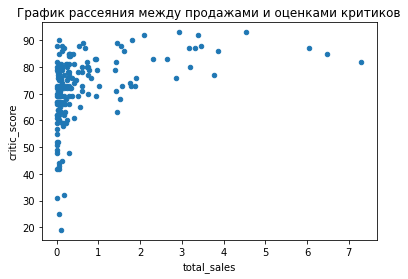

In [34]:
g = ps4_recent.plot.scatter(x = 'total_sales',
                          y = 'critic_score')
g.set_title('График рассеяния между продажами и оценками критиков')

Интересно что у всех игр с продажами от двух миллионов и выше - рейтинг от 70 и выше, при этом существуют игры с очень высоким рейтингом, но с мизерными продажами. Возможно разработчикам этих игр стоило лучше вкладываться в рекламу, или оценки критиков не всегда отражают качество игры как его видит пользователь.

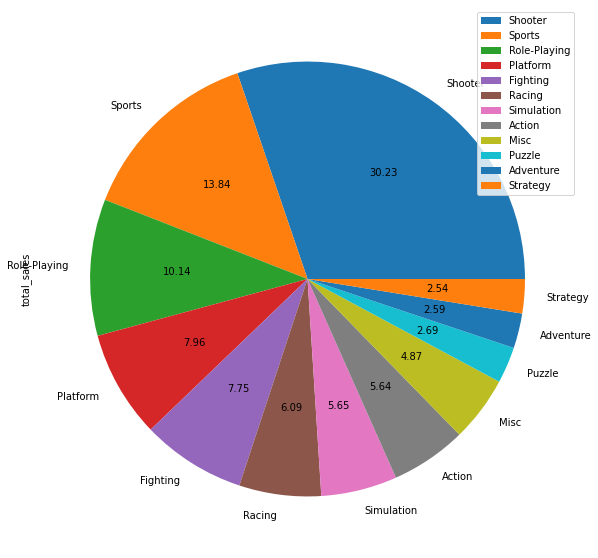

In [35]:
g = recent_games.pivot_table(index=['genre'],
                  values='total_sales',
                  aggfunc='mean').sort_values('total_sales',ascending=False).plot(kind='pie',
                                                                                  subplots=True,
                                                                                  figsize = (10,10),
                                                                                  autopct = '%.2f')

Самый продаваемый жанр в среднем по всем платформам за актуальный период - Shooter, Sport и Role-playing, самый плохо продаваемые - Strategy и Adventure.

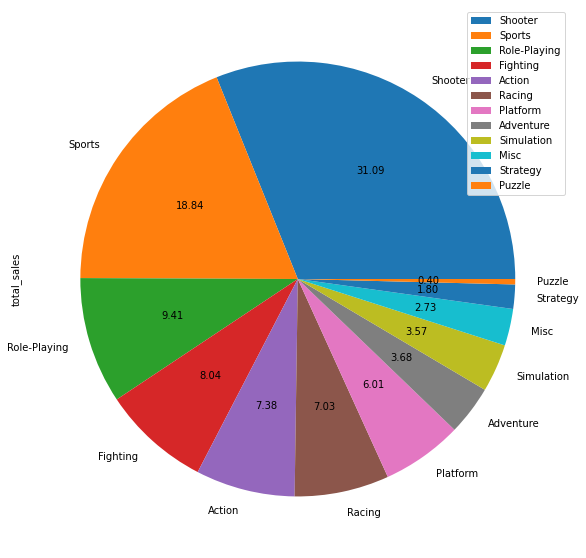

In [36]:
g = ps4_recent.pivot_table(index=['genre'],
                  values='total_sales',
                  aggfunc='mean').sort_values('total_sales',ascending=False).plot(kind='pie',
                                                                                  subplots=True,
                                                                                  figsize = (10,10),
                                                                                  autopct = '%.2f')

В фаворитах PS4 - Shooter и Sports, в лузерах - Strategy и Misc(Miscellaneous).

Sports занимают существенно большую долю продаж на PS4 чем в по всем топ5 платформам.

Text(0.5, 1.0, 'Доля продаж')

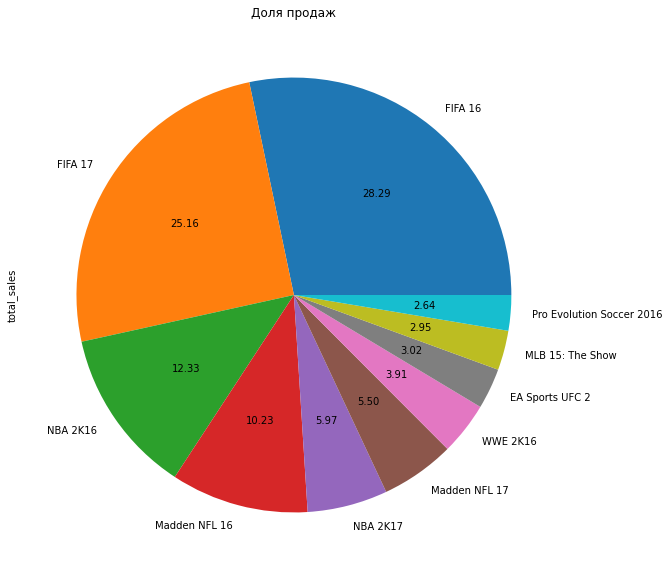

In [37]:
(ps4_recent.query('genre == "Sports"')
.groupby('name')['total_sales']
.sum()
.sort_values(ascending=False)
.head(10)
.plot(kind='pie',
      figsize = (10, 10),
      autopct = '%.2f')
).set_title('Доля продаж')


Игры Fifa занимают больше половины продаж всех спортивных игр на PS4

In [38]:
final_stats = (
    recent_games
    .pivot_table(index='genre', columns='year', values='total_sales',aggfunc='mean')
    .reset_index()
)

final_stats['2015_percentage'] = round(final_stats[2015] / final_stats[2015].sum() * 100)
final_stats['2016_percentage'] = round(final_stats[2016] / final_stats[2016].sum() * 100)
final_stats['2015_percentage'].corr(final_stats['2016_percentage'])

0.9193765617188268

Корреляция между жанрами за 2015 и 2016 год почти 92 процента.

## Портрет пользователя

Шаг 4. Составьте портрет пользователя каждого региона
Определите для пользователя каждого региона (NA, EU, JP):
Самые популярные платформы (топ-5). Опишите различия в долях продаж.
Самые популярные жанры (топ-5). Поясните разницу.
Влияет ли рейтинг ESRB на продажи в отдельном регионе?


Продажи за все время по странам


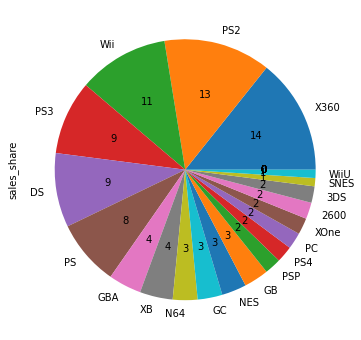

,na_sales,sales_share
platform,,
X360,602.47,14
PS2,583.84,13
Wii,496.90,11
PS3,393.49,9
DS,382.40,9


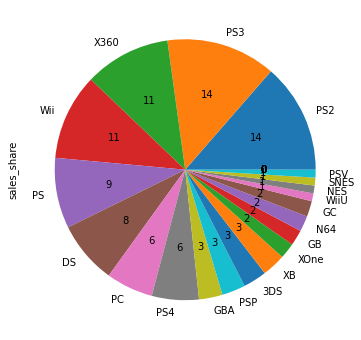

,eu_sales,sales_share
platform,,
PS2,339.29,14
PS3,330.29,14
X360,270.76,11
Wii,262.21,11
PS,213.61,9


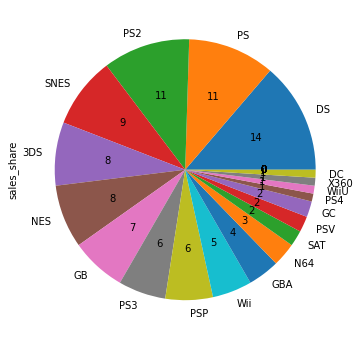

,jp_sales,sales_share
platform,,
DS,175.57,14
PS,139.82,11
PS2,139.20,11
SNES,116.55,9
3DS,100.67,8


In [39]:
regions = ['na_sales', 'eu_sales', 'jp_sales']

print('Продажи за все время по странам')

for region in regions:
    pivot = games.pivot_table(index='platform', values=region, aggfunc='sum').sort_values(region,ascending=False)
    pivot['sales_share'] = round(pivot[region] / pivot[region].sum() * 100).astype(int)
    #pivot['cumulative_share'] = round(100*(pivot.na_sales.cumsum() / pivot.na_sales.sum()))
    #Если подставлять region - он его не воспринимает изза кавычек
    pivot['sales_share'].plot(kind='pie', figsize=(6,6), autopct=('%.0f'))
    plt.show()
    display(pivot.head())

Продажи за 2015-2016 год по странам


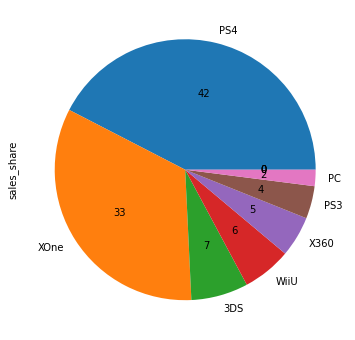

,na_sales,sales_share
platform,,
PS4,63.86,42
XOne,50.30,33
3DS,10.31,7
WiiU,8.86,6
X360,8.05,5


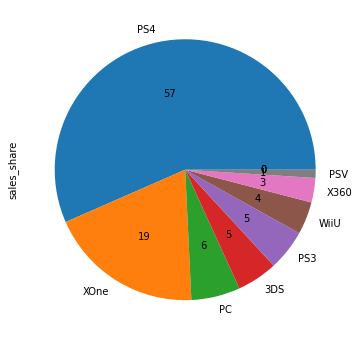

,eu_sales,sales_share
platform,,
PS4,83.54,56
XOne,28.10,19
PC,9.10,6
3DS,7.39,5
PS3,7.30,5


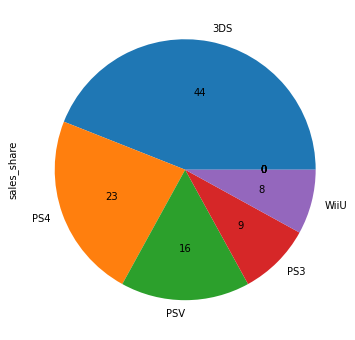

,jp_sales,sales_share
platform,,
3DS,23.55,44
PS4,12.05,23
PSV,8.41,16
PS3,4.97,9
WiiU,4.12,8


In [40]:
print('Продажи за 2015-2016 год по странам')

for region in regions:
    pivot = recent_games.pivot_table(index='platform', values=region, aggfunc='sum').sort_values(region,ascending=False)
    pivot['sales_share'] = round(pivot[region] / pivot[region].sum() * 100).astype(int)
    pivot['sales_share'].plot(kind='pie', figsize=(6,6), autopct=('%.0f'))
    plt.show()
    #pivot['cumulative_share'] = round(100*(pivot.na_sales.cumsum() / pivot.na_sales.sum()))
    #Если подставлять region - он его не воспринимает изза кавычек
    display(pivot.head())

Топы в Америке и Европе очень схожи, а в Японии рынок платформ сильно отличается.
Например в японии лидер рынка - платформа 3DS, которая занимает последние строки в топах Европы и Америки. 
PS4, которая занимает половину или больше половины рынка в Европе и Америке, в Японии имеет всего 23% рынка.
В 2015-2016 году топ 5 платформ занимали почти весь(>90%) объем продаж рынка, а отдельные платформы, например PS4 в Европе занимают около 56% . В то же время, за весь период наблюдений самая популярная приставка не имела больше 14% рынка.

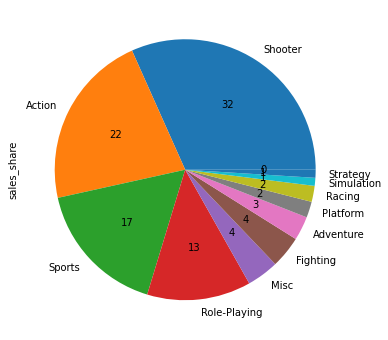

,na_sales,sales_share
genre,,
Shooter,48.18,32
Action,33.68,22
Sports,26.31,17
Role-Playing,19.82,13
Misc,5.58,4
Fighting,5.54,4
Adventure,3.84,3
Platform,3.78,2
Racing,2.82,2


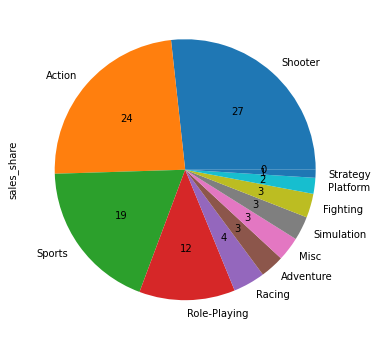

,eu_sales,sales_share
genre,,
Shooter,40.28,27
Action,34.82,24
Sports,27.82,19
Role-Playing,17.21,12
Racing,6.52,4
Adventure,4.67,3
Misc,4.26,3
Simulation,3.74,3
Fighting,3.72,3


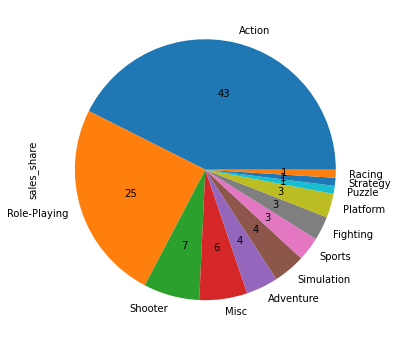

,jp_sales,sales_share
genre,,
Action,23.05,43
Role-Playing,13.41,25
Shooter,3.79,7
Misc,3.19,6
Adventure,2.22,4
Simulation,1.93,4
Sports,1.65,3
Fighting,1.54,3
Platform,1.42,3


In [41]:
regions = ['na_sales', 'eu_sales', 'jp_sales']
for region in regions:
    pivot = recent_games.pivot_table(index='genre', values=region, aggfunc='sum').sort_values(region,ascending=False)
    pivot['sales_share'] = round(pivot[region] / pivot[region].sum() * 100).astype(int)
    pivot['sales_share'].plot(kind='pie', figsize=(6,6), autopct=('%.0f'))
    plt.show()
    display(pivot)

Топ 5 самых популярных жанров для Северной Америки - Action - 20%
Sports - 16%
Shooter - 13%
Platform - 10%
Misc - 9%

Всего: 68%

Топ 5 самых популярных жанров для Европы - Action - 21%
Sports - 16%
Shooter - 13%
Racing - 10%
Misc - 9%

Всего: 69%

Топ 5 самых популярных жанров для Японии - Role-Playing - 27%
Action - 12%
Sports - 10%
Platform - 10%
Misc - 8%

Всего: 67%

Между Европой и Америкой практически нет различий, но в Японии распределение жанров сильно отличается от этих регионов. Большой кусок рынка занимают игры жанра Role-playing, и существенный кусок занимают игры жанра Platform.

Один из самых прибыльных жанров в Европе и Америке, shooter(13%), оказался на последней строчке в Японии(3%).

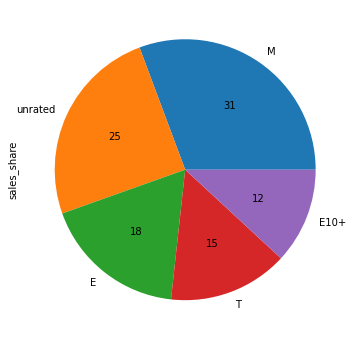

,na_sales,sales_share
rating,,
M,47.03,31
unrated,37.44,25
E,26.59,18
T,22.86,15
E10+,17.87,12


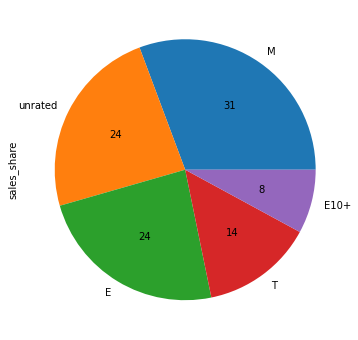

,eu_sales,sales_share
rating,,
M,45.54,31
unrated,35.71,24
E,34.83,24
T,20.32,14
E10+,11.54,8


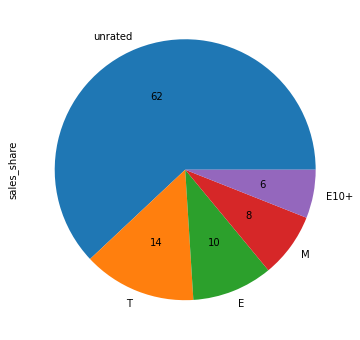

,jp_sales,sales_share
rating,,
unrated,32.89,62
T,7.70,14
E,5.25,10
M,4.29,8
E10+,3.27,6


In [42]:
regions = ['na_sales', 'eu_sales', 'jp_sales']
for region in regions:
    pivot = recent_games.pivot_table(index='rating', values=region, aggfunc='sum').sort_values(region,ascending=False)
    pivot['sales_share'] = round(pivot[region] / pivot[region].sum() * 100).astype(int)
    pivot['sales_share'].plot(kind='pie', figsize=(6,6), autopct=('%.0f'))
    plt.show()
    display(pivot)

Во всех трех регионах рейтинги практически одинаково влияют на продажи. Топ1 продаж во всех регионах приходится на E - 41, 39 и 44 процента соответственно. Рейтинг RP занимает околонулевую долю продаж во всех регионах.

## Проверка гипотез

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.


Для первого вопроса:
H0 - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
H1 - Средние пользовательские рейтинги платформ Xbox One и PC разные.

Для второго вопроса.
H0 - Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые.
H1 - Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

In [43]:
alpha = 0.01

results = st.ttest_ind(recent_games[recent_games['platform'] == "XOne"]['user_score'].astype('float'), 
                       recent_games[recent_games['platform'] == "PC"]['user_score'].astype('float'), 
                       equal_var = True,
                       nan_policy='omit')

print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:

    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.2778542084733886
Не получилось отвергнуть нулевую гипотезу


Не получилось отвергнуть нулевую гипотезу, следовательно различие между пользовательскими оценками игр на платформах XOne и PC не статистически значимо.

In [44]:
alpha = 0.01

results = st.ttest_ind(recent_games[recent_games['genre'] == "Action"]['user_score'].astype('float'), 
                       recent_games[recent_games['genre'] == "Sports"]['user_score'].astype('float'), 
                       equal_var = True,
                       nan_policy='omit')

print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:

    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.0012846807938657e-13
Отвергаем нулевую гипотезу


Мы отвергли нулевую гипотезу, следовательно различия пользовательских оценок между Action и Sports статистически значимы.

## Итоговый вывод

Рынок игр очень непостоянен. Среднее время жизни платформ составляет 5-7 лет. Есть большие отличия в жанрах между Японией и западными рынками. Самые прибыльные жанры это Action, Role-playing и Sports.